<a href="https://colab.research.google.com/github/PaoDeVi/T-picos-IA/blob/main/Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####PREPARACIÓN DE LOS DATOS

In [ ]:
training_table = pd.read_csv('/content/drive/MyDrive/Tópicos IA/proteins_training_set.csv') #Cargado y lectura de la base de datos
training_table.dropna() #Eliminar filas con valores nulos (no existen en la base de datos)
training_table

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,1065,1076,0.994,1.790,1.010,2.367,5.562073,0.117928,-0.045020,32.418821,1
1,380,392,1.065,0.209,1.024,0.885,5.718933,0.071295,-0.190056,34.849362,1
2,11,18,0.950,1.080,1.048,1.950,4.348450,0.152672,-0.311450,35.357634,1
3,105,119,0.836,0.028,1.083,-0.827,11.713196,0.064286,-0.622857,79.027143,1
4,172,186,1.014,0.185,1.044,1.960,4.749329,0.036269,0.309326,30.149741,1
...,...,...,...,...,...,...,...,...,...,...,...
9199,1901,1910,1.025,1.246,0.990,1.830,4.415710,0.119189,-0.318259,36.520702,0
9200,197,205,1.173,1.283,0.936,5.356,5.644714,0.070299,-0.312478,28.067311,0
9201,37,46,1.062,0.030,1.098,-0.220,9.940857,0.050343,-1.839817,79.509611,0
9202,460,467,0.789,0.104,1.137,-2.450,8.272888,0.072491,-0.189591,30.442026,0


In [ ]:
training_table.info()
training_table.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9204 entries, 0 to 9203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   start_position       9204 non-null   int64  
 1   end_position         9204 non-null   int64  
 2   chou_fasman          9204 non-null   float64
 3   emini                9204 non-null   float64
 4   kolaskar_tongaonkar  9204 non-null   float64
 5   parker               9204 non-null   float64
 6   isoelectric_point    9204 non-null   float64
 7   aromaticity          9204 non-null   float64
 8   hydrophobicity       9204 non-null   float64
 9   stability            9204 non-null   float64
 10  target               9204 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 791.1 KB


,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000
mean,297.146132,307.544437,0.995622,1.061380,1.020837,1.771465,7.073525,0.075740,-0.409254,43.796202,0.271078
std,351.868201,351.844756,0.124823,1.626202,0.053553,1.967776,1.882956,0.025510,0.396705,16.642564,0.444540
min,1.000000,6.000000,0.534000,0.000000,0.849000,-9.029000,3.686096,0.000000,-1.971171,5.448936,0.000000
25%,85.000000,96.000000,0.912000,0.252000,0.986000,0.600000,5.621033,0.062500,-0.606215,31.720181,0.000000
50%,192.000000,202.000000,0.991000,0.560500,1.020000,1.791000,6.519104,0.074890,-0.330540,42.287268,0.000000
75%,381.000000,391.000000,1.074000,1.206000,1.055000,2.993000,8.676575,0.091312,-0.189591,49.101172,1.000000
max,3021.000000,3033.000000,1.546000,25.145000,1.255000,9.120000,12.232727,0.182254,1.267089,137.046667,1.000000


In [ ]:
validation_table = pd.read_csv('/content/drive/MyDrive/Tópicos IA/proteins_validation_set.csv') #Cargado y lectura de la base de datos
validation_table.dropna() #Eliminar filas con valores nulos (no existen en la base de datos)
validation_table

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,581,590,1.081,5.160,0.916,5.500,6.740540,0.100000,-0.704125,33.181625,1
1,366,375,0.728,0.778,1.014,0.550,5.702576,0.031414,-0.076440,30.193194,1
2,173,181,0.939,1.327,1.012,1.800,5.226501,0.073705,0.016335,14.673307,1
3,583,597,1.038,0.530,1.049,0.267,4.971985,0.087859,-0.101438,47.006230,1
4,416,430,0.915,0.096,1.111,1.513,8.778992,0.054545,0.154909,43.056182,1
...,...,...,...,...,...,...,...,...,...,...,...
2298,237,246,1.028,0.910,0.979,2.850,5.877991,0.077225,-0.600131,31.614529,0
2299,126,140,1.047,0.239,1.065,2.147,12.232727,0.049327,-1.155605,83.782063,0
2300,227,235,1.170,3.802,0.981,4.944,8.457703,0.058824,-0.447479,19.310084,0
2301,436,444,0.936,0.109,1.080,-2.767,5.644714,0.070299,-0.312478,28.067311,0


In [ ]:
validation_table.info()
validation_table.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   start_position       2303 non-null   int64  
 1   end_position         2303 non-null   int64  
 2   chou_fasman          2303 non-null   float64
 3   emini                2303 non-null   float64
 4   kolaskar_tongaonkar  2303 non-null   float64
 5   parker               2303 non-null   float64
 6   isoelectric_point    2303 non-null   float64
 7   aromaticity          2303 non-null   float64
 8   hydrophobicity       2303 non-null   float64
 9   stability            2303 non-null   float64
 10  target               2303 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 198.0 KB


,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,304.455927,314.883196,0.991561,1.082137,1.021907,1.746822,7.019383,0.075801,-0.405247,43.951944,0.271385
std,364.588313,364.606542,0.124451,1.719964,0.054546,1.997851,1.871707,0.026399,0.396229,16.909733,0.444771
min,1.000000,8.000000,0.541000,0.000000,0.853000,-7.553000,3.686096,0.000000,-1.971171,13.974684,0.000000
25%,85.000000,95.000000,0.909000,0.236000,0.987000,0.560000,5.621033,0.060606,-0.600131,31.614529,0.000000
50%,192.000000,201.000000,0.986000,0.535000,1.022000,1.788000,6.499573,0.074890,-0.330540,42.287268,0.000000
75%,386.000000,395.000000,1.069500,1.208500,1.056000,3.021000,8.676575,0.091312,-0.189591,49.101172,1.000000
max,3079.000000,3086.000000,1.470000,21.357000,1.236000,7.660000,12.232727,0.167116,1.267089,137.046667,1.000000


In [ ]:
testing_table = pd.read_csv('/content/drive/MyDrive/Tópicos IA/proteins_test_set.csv') #Cargado y lectura de la base de datos
testing_table.dropna() #Eliminar filas con valores nulos (no existen en la base de datos)
testing_table

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,22,26,0.888,0.633,0.974,2.660,6.867493,0.103846,-0.578846,21.684615,1
1,28,32,0.916,1.757,1.040,1.700,6.899475,0.125828,0.256291,20.358278,1
2,262,266,0.822,0.110,1.157,-4.180,4.988220,0.060606,-0.615488,43.388552,1
3,2,6,1.198,2.614,0.923,4.380,4.487366,0.055092,-0.691987,68.596661,1
4,154,158,1.042,1.919,0.984,4.260,10.843933,0.025773,-1.072680,22.589175,1
...,...,...,...,...,...,...,...,...,...,...,...
2873,61,75,1.011,0.360,0.998,1.520,4.573181,0.061303,-0.094636,45.154023,0
2874,161,175,1.055,0.335,1.042,2.907,4.573181,0.061303,-0.094636,45.154023,0
2875,51,65,1.100,4.101,0.973,3.407,4.573181,0.061303,-0.094636,45.154023,0
2876,128,142,0.999,1.049,0.989,3.093,8.855652,0.050847,-0.297034,42.831780,0


In [ ]:
testing_table.info()
testing_table.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   start_position       2878 non-null   int64  
 1   end_position         2878 non-null   int64  
 2   chou_fasman          2878 non-null   float64
 3   emini                2878 non-null   float64
 4   kolaskar_tongaonkar  2878 non-null   float64
 5   parker               2878 non-null   float64
 6   isoelectric_point    2878 non-null   float64
 7   aromaticity          2878 non-null   float64
 8   hydrophobicity       2878 non-null   float64
 9   stability            2878 non-null   float64
 10  target               2878 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 247.5 KB


,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000
mean,294.119180,304.548992,0.994323,1.036923,1.021739,1.769360,7.085583,0.075625,-0.396709,43.210806,0.271369
std,351.006064,351.024633,0.124904,1.525401,0.054026,1.950652,1.919208,0.026085,0.386651,16.628263,0.444743
min,1.000000,6.000000,0.543000,0.001000,0.838000,-8.686000,4.041443,0.000000,-1.839817,8.855801,0.000000
25%,78.250000,89.000000,0.910000,0.247000,0.985000,0.629000,5.621033,0.059406,-0.600131,31.614529,0.000000
50%,184.500000,195.000000,0.991000,0.560000,1.020000,1.813000,6.665466,0.073529,-0.326993,41.752174,0.000000
75%,382.000000,393.000000,1.075000,1.215750,1.056000,3.020000,8.676575,0.092555,-0.189591,49.101172,1.000000
max,2755.000000,2768.000000,1.470000,27.189000,1.232000,8.425000,12.232727,0.180602,1.267089,137.046667,1.000000


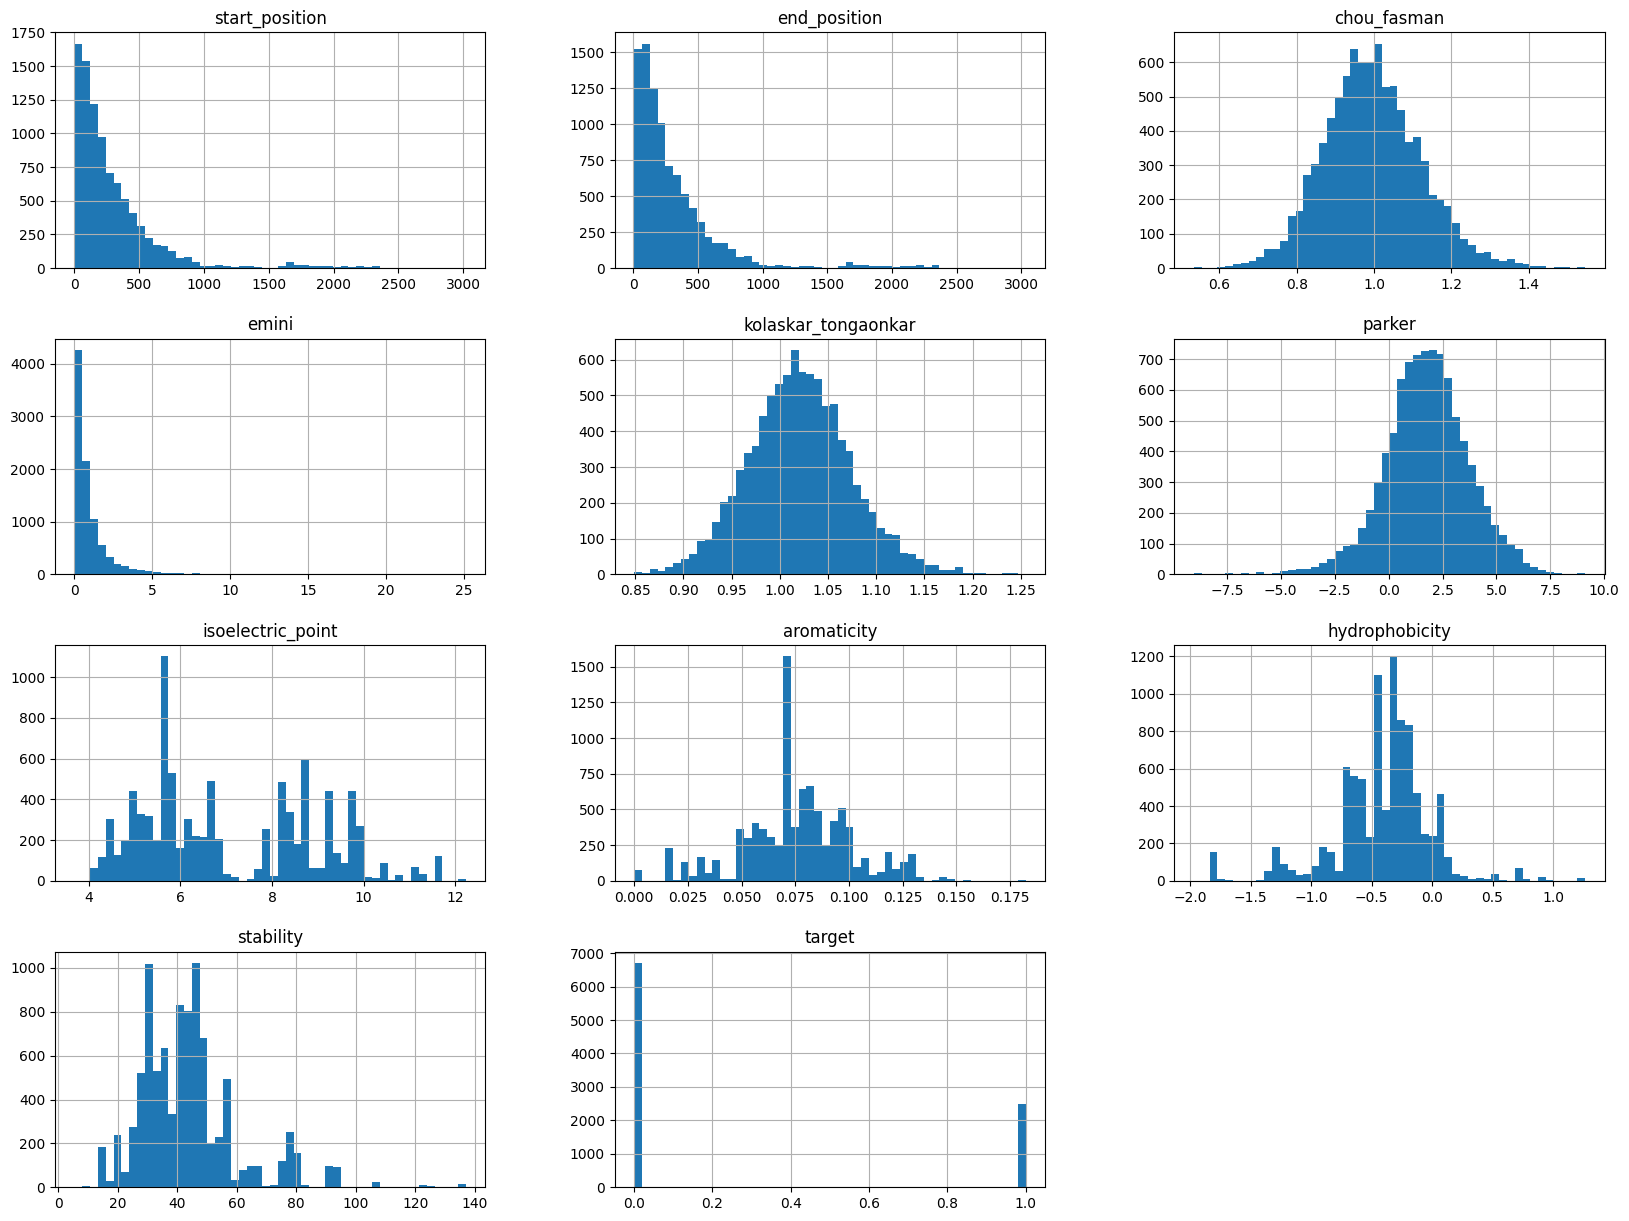

In [ ]:
training_table.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
conteo_clases = training_table['target'].value_counts()
print("Set de entrenamiento")
display(conteo_clases)
print("Set de validación")
conteo_clases = validation_table['target'].value_counts()
display(conteo_clases)
print("Set de prueba")
conteo_clases = testing_table['target'].value_counts()
display(conteo_clases)

Set de entrenamiento


target
0    6709
1    2495
Name: count, dtype: int64

Set de validación


target
0.0    1678
1.0     625
Name: count, dtype: int64

Set de prueba


target
0.0    2097
1.0     781
Name: count, dtype: int64

In [ ]:
def balancear_columna(df, columna):
    # Contar la cantidad de valores únicos en la columna
    conteo_valores = df[columna].value_counts()

    # Obtener la cantidad máxima de valores entre 0 y 1
    maximo_valores = max(conteo_valores[0], conteo_valores[1])

    # Filtrar los datos para obtener la misma cantidad de 0s y 1s
    df_balanceado = pd.concat([
        df[df[columna] == 0].sample(maximo_valores, replace=True),
        df[df[columna] == 1].sample(maximo_valores, replace=True)
    ])

    return df_balanceado

#Balancear la base de datos
training_table = balancear_columna(training_table,'target')
conteo_clases = training_table['target'].value_counts()
print("Set de entrenamiento")
display(conteo_clases)

validation_table = balancear_columna(validation_table,'target')
conteo_clases = validation_table['target'].value_counts()
print("Set de validación")
display(conteo_clases)

testing_table = balancear_columna(testing_table,'target')
conteo_clases = testing_table['target'].value_counts()
print("Set de Prueba")
display(conteo_clases)

training_table.describe()

Set de entrenamiento


target
0    6709
1    6709
Name: count, dtype: int64

Set de validación


target
0.0    1678
1.0    1678
Name: count, dtype: int64

Set de Prueba


target
0.0    2097
1.0    2097
Name: count, dtype: int64

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000
mean,279.982933,290.457594,1.000141,1.099970,1.020825,1.773790,6.958187,0.076238,-0.383599,44.285002,0.500000
std,327.151269,327.209836,0.126763,1.694277,0.053435,1.930634,1.841790,0.025241,0.404079,17.012321,0.500019
min,1.000000,6.000000,0.534000,0.000000,0.849000,-7.514000,3.686096,0.000000,-1.971171,5.448936,0.000000
25%,83.000000,94.000000,0.916000,0.263000,0.987000,0.600000,5.562073,0.062176,-0.600131,32.184826,0.000000
50%,181.000000,191.000000,0.994000,0.579000,1.020000,1.783000,6.447815,0.074890,-0.325000,42.400993,0.500000
75%,365.000000,375.000000,1.077000,1.242000,1.054000,2.983000,8.581116,0.091787,-0.169681,49.680661,1.000000
max,3021.000000,3033.000000,1.531000,23.306000,1.255000,9.120000,12.232727,0.182254,1.267089,137.046667,1.000000


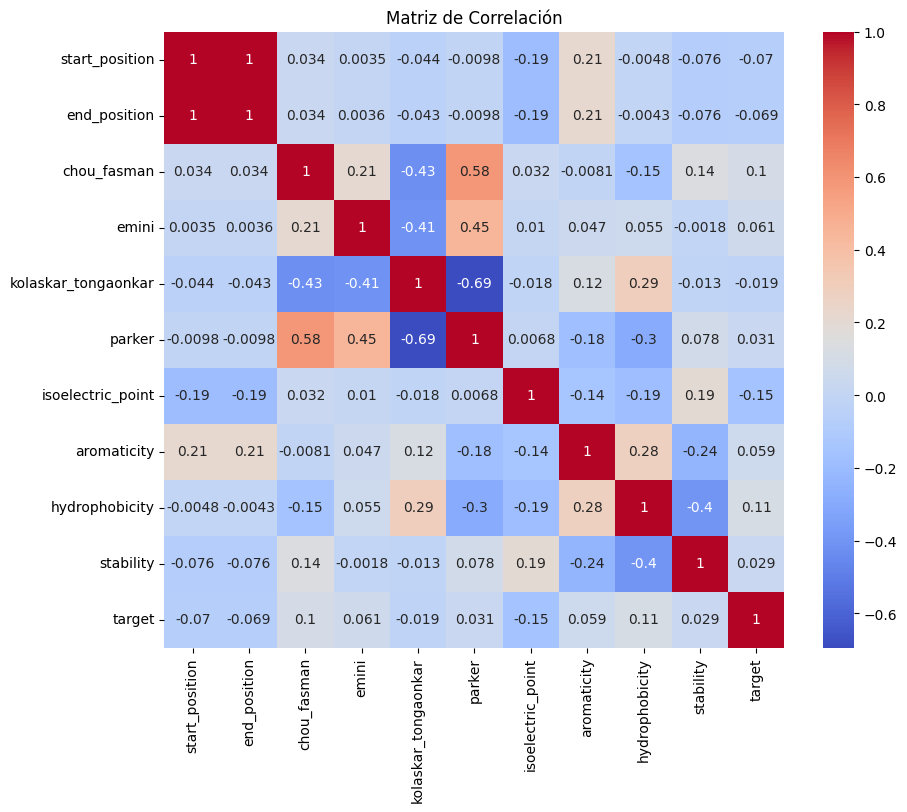

In [ ]:
def normalizar(table):
  numeric_columns = table.select_dtypes(include=[np.number])
  for column in numeric_columns:
      max_abs_value = table[column].abs().max()
      table[column] = (table[column] - table[column].min()) / (max_abs_value - table[column].min())
  return table

training_table = normalizar(training_table)
validation_table = normalizar(validation_table)
testing_table = normalizar(testing_table)

# Calcular la matriz de correlación
correlation_matrix = training_table.corr()

# Visualizar la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

#training_table.insert(0, 'intercept', 1)
#validation_table.insert(0, 'intercept', 1)
#testing_table.insert(0, 'intercept', 1)

####REGRESIÓN LOGÍSTICA

In [ ]:
# Función g
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def logistic_regression(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [ ]:
def gradient_descent_logistic(X, theta, y, alpha, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        y_pred = logistic_regression(X, theta)
        error = y_pred - y
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient
        cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        cost_history.append(cost)

    return theta, cost_history

In [ ]:
def predict(X, theta):
    y_pred = logistic_regression(X, theta)
    y_pred_class = (y_pred >= 0.5).astype(int)
    return y_pred_class

####PRIMER MODELO: TODAS LAS CARACTERÍSTICAS

Coeficientes finales:
[[-1.13947496]
 [-1.11335615]
 [ 1.53587861]
 [ 0.86828098]
 [-0.87186618]
 [-1.12829532]
 [-1.78113233]
 [ 0.4939793 ]
 [ 1.52224724]
 [ 1.0876131 ]]


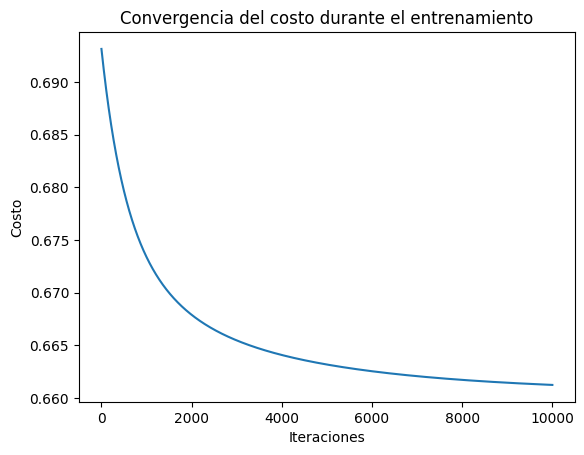

In [ ]:
X = (training_table.drop(columns = ['target'])).values
y = training_table['target'].values.reshape(-1, 1)

# Inicializar parámetros y llamar a la función de gradiente descendente
initial_theta = np.zeros((X.shape[1], 1))
alpha = 0.1
epochs = 10000

theta_final, cost_history = gradient_descent_logistic(X, initial_theta, y, alpha, epochs)

# Imprimir los coeficientes finales
print("Coeficientes finales:")
print(theta_final)

# Graficar la convergencia del costo
plt.plot(cost_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Convergencia del costo durante el entrenamiento')
plt.show()

TPR:  0.6775923718712753
TNR:  0.5375446960667462
Accuracy: 0.6075685339690108


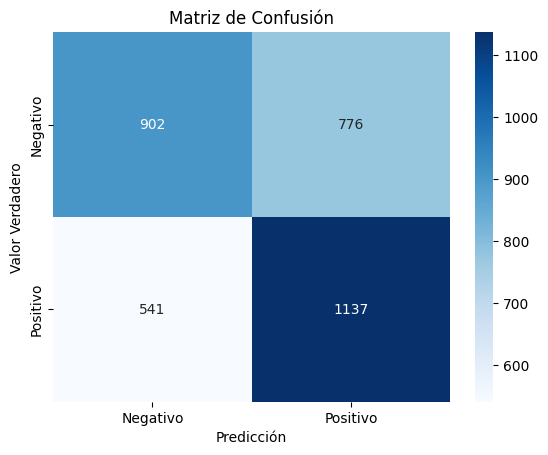

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones de validación
X = (validation_table.drop(columns = ['target'])).values
y = validation_table['target'].values.reshape(-1, 1)

y_pred = predict(X, theta_final)

# Calcular TPR y TNR
TP = np.sum((y_pred == 1) & (y == 1))
FN = np.sum((y_pred == 0) & (y == 1))

TN = np.sum((y_pred == 0) & (y == 0))
FP = np.sum((y_pred == 1) & (y == 0))

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print("TPR: ", TPR)
print("TNR: " ,TNR)

accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

# Definir la matriz de confusión
confusion_matrix = np.array([[TN, FP], [FN, TP]])

# Etiquetas para los ejes x e y
labels = ['Negativo', 'Positivo']

# Crear un mapa de calor de la matriz de confusión
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Añadir etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.title('Matriz de Confusión')

# Mostrar el mapa de calor
plt.show()



TPR:  0.6604673342870768
TNR:  0.5546018121125418
Accuracy: 0.6075345731998093


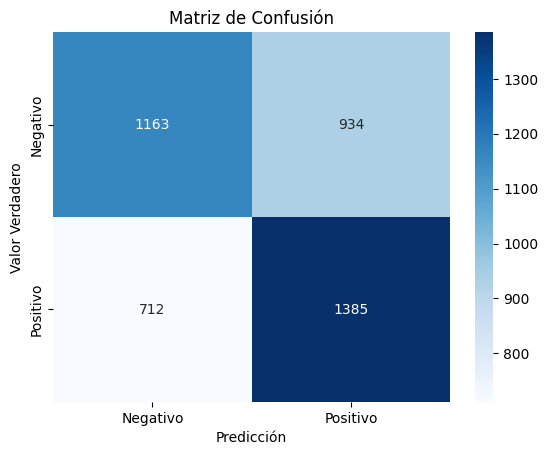

In [ ]:
# Obtener las predicciones de prueba
X = (testing_table.drop(columns = ['target'])).values
y = testing_table['target'].values.reshape(-1, 1)

y_pred = predict(X, theta_final)

# Calcular TPR y TNR
TP = np.sum((y_pred == 1) & (y == 1))
FN = np.sum((y_pred == 0) & (y == 1))

TN = np.sum((y_pred == 0) & (y == 0))
FP = np.sum((y_pred == 1) & (y == 0))

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print("TPR: ", TPR)
print("TNR: " ,TNR)

accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

# Definir la matriz de confusión
confusion_matrix = np.array([[TN, FP], [FN, TP]])

# Etiquetas para los ejes x e y
labels = ['Negativo', 'Positivo']

# Crear un mapa de calor de la matriz de confusión
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Añadir etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.title('Matriz de Confusión')

# Mostrar el mapa de calor
plt.show()



####SEGUNDO MODELO: SOLO CARACTERÍSTICAS RELEVANTES

Coeficientes finales:
[[ 0.00830313]
 [ 0.7200438 ]
 [-0.17816167]
 [-1.55169385]
 [ 1.34357598]
 [ 1.31566421]]


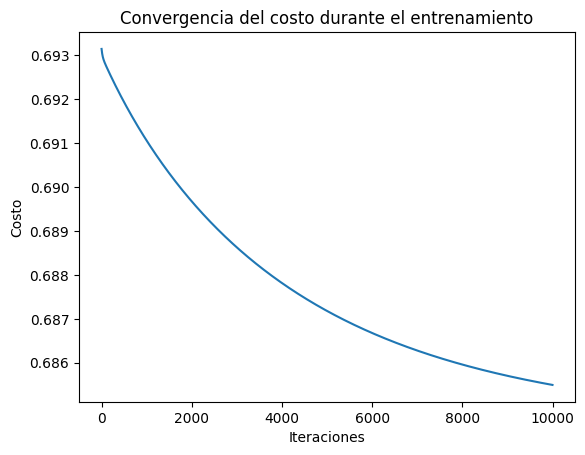

In [ ]:
X = training_table[['stability','hydrophobicity','aromaticity','parker','emini','chou_fasman']].values
y = training_table['target'].values.reshape(-1, 1)

# Inicializar parámetros y llamar a la función de gradiente descendente
initial_theta = np.zeros((X.shape[1], 1))
alpha = 0.1
epochs = 10000

theta_final, cost_history = gradient_descent_logistic(X, initial_theta, y, alpha, epochs)

# Imprimir los coeficientes finales
print("Coeficientes finales:")
print(theta_final)

# Graficar la convergencia del costo
plt.plot(cost_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Convergencia del costo durante el entrenamiento')
plt.show()

TPR:  0.599523241954708
TNR:  0.4755661501787843
Accuracy: 0.5375446960667462


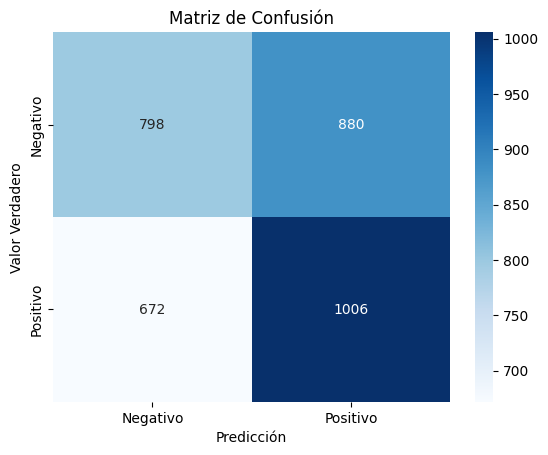

In [ ]:
# Obtener las predicciones de validación
X = validation_table[['stability','hydrophobicity','aromaticity','parker','emini','chou_fasman']].values
y = validation_table['target'].values.reshape(-1, 1)

y_pred = predict(X, theta_final)

# Calcular TPR y TNR
TP = np.sum((y_pred == 1) & (y == 1))
FN = np.sum((y_pred == 0) & (y == 1))

TN = np.sum((y_pred == 0) & (y == 0))
FP = np.sum((y_pred == 1) & (y == 0))

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print("TPR: ", TPR)
print("TNR: " ,TNR)

accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

# Definir la matriz de confusión
confusion_matrix = np.array([[TN, FP], [FN, TP]])

# Etiquetas para los ejes x e y
labels = ['Negativo', 'Positivo']

# Crear un mapa de calor de la matriz de confusión
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Añadir etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.title('Matriz de Confusión')

# Mostrar el mapa de calor
plt.show()

TPR:  0.4711492608488317
TNR:  0.6385312350977587
Accuracy: 0.5548402479732952


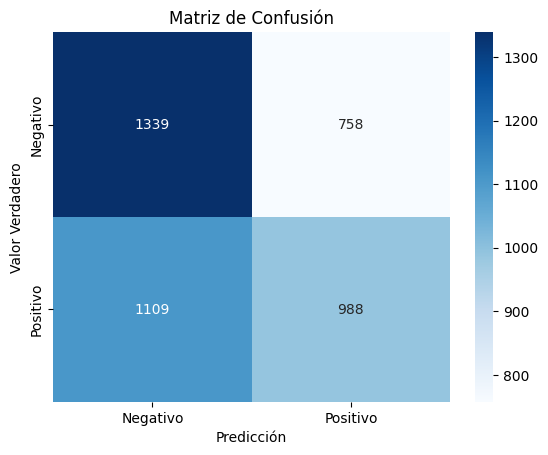

In [ ]:
# Obtener las predicciones de validación

X = testing_table[['stability','hydrophobicity','aromaticity','parker','emini','chou_fasman']].values
y = testing_table['target'].values.reshape(-1, 1)

y_pred = predict(X, theta_final)

# Calcular TPR y TNR
TP = np.sum((y_pred == 1) & (y == 1))
FN = np.sum((y_pred == 0) & (y == 1))

TN = np.sum((y_pred == 0) & (y == 0))
FP = np.sum((y_pred == 1) & (y == 0))

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print("TPR: ", TPR)
print("TNR: " ,TNR)

accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

# Definir la matriz de confusión
confusion_matrix = np.array([[TN, FP], [FN, TP]])

# Etiquetas para los ejes x e y
labels = ['Negativo', 'Positivo']

# Crear un mapa de calor de la matriz de confusión
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Añadir etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.title('Matriz de Confusión')

# Mostrar el mapa de calor
plt.show()